## One Action potential

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

# Constants
C_m = 1.0  # membrane capacitance (uF/cm^2)
g_Na = 120.0  # sodium conductance (mS/cm^2)
g_K = 36.0  # potassium conductance (mS/cm^2)
g_L = 0.3  # leak conductance (mS/cm^2)
E_Na = 50.0  # sodium reversal potential (mV)
E_K = -77.0  # potassium reversal potential (mV)
E_L = -54.387  # leak reversal potential (mV)

# Hodgkin-Huxley model equations
def hodgkin_huxley_model(y, t, I):
    V, m, h, n = y
    
    # Membrane currents
    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_K = g_K * n**4 * (V - E_K)
    I_L = g_L * (V - E_L)
    
    # Total membrane current
    dVdt = (I - I_Na - I_K - I_L) / C_m
    
    # Gating variable dynamics
    alpha_m = 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))
    beta_m = 4.0 * np.exp(-(V + 65.0) / 18.0)
    alpha_h = 0.07 * np.exp(-(V + 65.0) / 20.0)
    beta_h = 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))
    alpha_n = 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))
    beta_n = 0.125 * np.exp(-(V + 65.0) / 80.0)
    
    # Update gating variables
    dmdt = alpha_m * (1 - m) - beta_m * m
    dhdt = alpha_h * (1 - h) - beta_h * h
    dndt = alpha_n * (1 - n) - beta_n * n
    
    return [dVdt, dmdt, dhdt, dndt]



# Simulation parameters
dt = 0.025  # time step (ms)
t_sim = np.arange(0, 250, dt)  # simulation time (ms)

# Initial conditions
initial_state = [-65, 0.05, 0.6, 0.32]  # initial values for [V, m, h, n]

# Create a step function for the input current
#def input_current(t, I_max, step_start, step_duration):
    #return I_max if (step_start <= t < step_start + step_duration) else 0.0



In [ ]:
# Simulate the Hodgkin-Huxley model with a step function input
def hodgkin_huxley_model_with_input(y, t):
    I = input_current(t, I_max=10.0, step_start=5.0, step_duration=10.0)
    return hodgkin_huxley_model(y, t, I)

# Simulate the Hodgkin-Huxley model
result = odeint(hodgkin_huxley_model_with_input, initial_state, t_sim)

# Create a DataFrame
columns = ['time', 'voltage', 'stim']
df = pd.DataFrame(columns=columns)

# Fill the DataFrame with simulation results
df['time'] = t_sim
df['voltage'] = result[:, 0]
df['stim'] = [input_current(t, I_max=10.0, step_start=5.0, step_duration=10.0) for t in t_sim]


# Plot the simulation results
plt.figure(figsize=(10, 6))

# Plot membrane voltage
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['voltage'], label='Membrane Voltage (mV)')
plt.title('Hodgkin-Huxley Model Simulation with Step Function Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage (mV)')
plt.legend()

# Plot input current
plt.subplot(2, 1, 2)
plt.step(df['time'], df['stim'], label='Input Current (uA/cm^2)', color='orange', where='post')
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (uA/cm^2)')
plt.legend()

plt.tight_layout()
plt.show()

#save df to zipped csv
output_filename = 'hh_1ap.zip'
df.to_csv(output_filename, index=False, compression='zip')

## Multi Action Potential

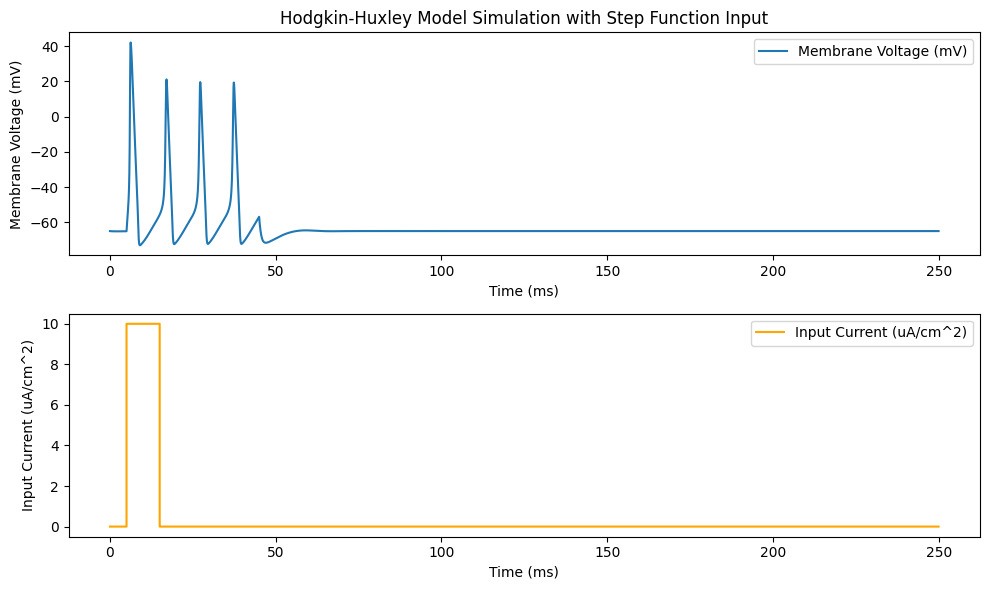

In [22]:
# Simulate the Hodgkin-Huxley model with a step function input
def hodgkin_huxley_model_with_input(y, t):
    I = input_current(t, I_max=30.0, step_start=5.0, step_duration=40.0)
    return hodgkin_huxley_model(y, t, I)

# Simulate the Hodgkin-Huxley model
result = odeint(hodgkin_huxley_model_with_input, initial_state, t_sim)

# Create a DataFrame
columns = ['time', 'voltage', 'stim']
df = pd.DataFrame(columns=columns)

# Fill the DataFrame with simulation results
df['time'] = t_sim
df['voltage'] = result[:, 0]
df['stim'] = [input_current(t, I_max=10.0, step_start=5.0, step_duration=10.0) for t in t_sim]


# Plot the simulation results
plt.figure(figsize=(10, 6))

# Plot membrane voltage
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['voltage'], label='Membrane Voltage (mV)')
plt.title('Hodgkin-Huxley Model Simulation with Step Function Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage (mV)')
plt.legend()

# Plot input current
plt.subplot(2, 1, 2)
plt.step(df['time'], df['stim'], label='Input Current (uA/cm^2)', color='orange', where='post')
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (uA/cm^2)')
plt.legend()

plt.tight_layout()
plt.show()

#save df to zipped csv
output_filename = 'hh_multap.zip'
df.to_csv(output_filename, index=False, compression='zip')

## No AP

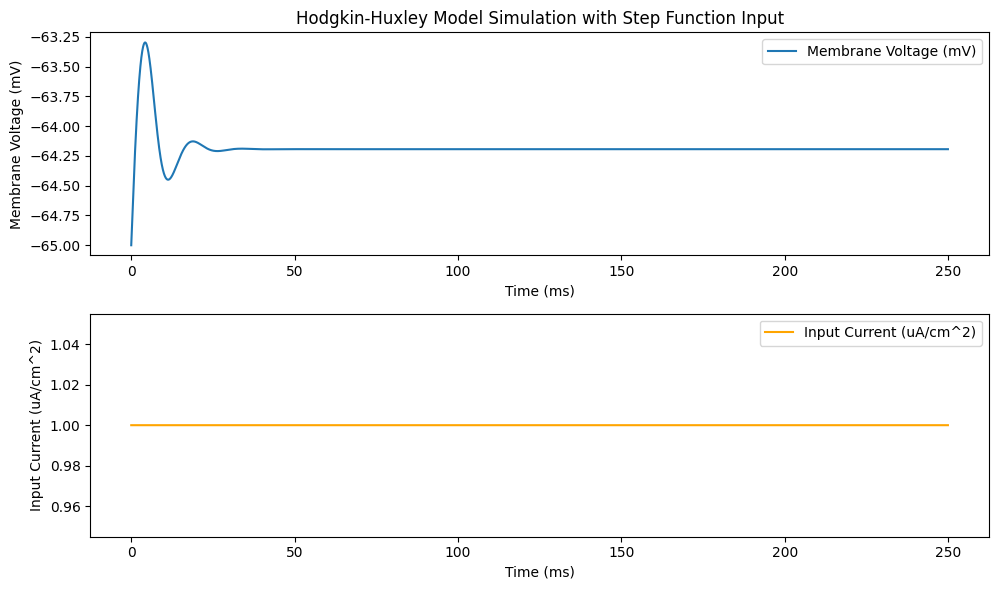

In [5]:
# Simulate the Hodgkin-Huxley model with a step function input
def input_current(t):
    return 1.0  # Set a value below the threshold for action potential initiation


def hodgkin_huxley_model_with_input(y, t):
    I = input_current(t)
    return hodgkin_huxley_model(y, t, I)

# Simulate the Hodgkin-Huxley model
result = odeint(hodgkin_huxley_model_with_input, initial_state, t_sim)

# Create a DataFrame
columns = ['time', 'voltage', 'stim']
df = pd.DataFrame(columns=columns)

# Fill the DataFrame with simulation results
df['time'] = t_sim
df['voltage'] = result[:, 0]
df['stim'] = [input_current(t) for t in t_sim]

# Plot the simulation results
plt.figure(figsize=(10, 6))

# Plot membrane voltage
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['voltage'], label='Membrane Voltage (mV)')
plt.title('Hodgkin-Huxley Model Simulation with Step Function Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage (mV)')
plt.legend()

# Plot input current
plt.subplot(2, 1, 2)
plt.step(df['time'], df['stim'], label='Input Current (uA/cm^2)', color='orange', where='post')
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (uA/cm^2)')
plt.legend()

plt.tight_layout()
plt.show()

#save df to zipped csv
output_filename = 'hh_noap.zip'
df.to_csv(output_filename, index=False, compression='zip')